# Importing Libraries

In [1]:
# Data Handling
import numpy as np # Fatser mathematical operations
import pandas as pd # Data handling and storing 

# Data Viz.
import matplotlib.pyplot as plt # Data Viz.
import seaborn as sns # Data Viz.

# Scikit Learn
from sklearn.datasets import load_iris # Data set - Iris flowers species
from sklearn.model_selection import train_test_split # Splitting the dataset 
from sklearn.preprocessing import StandardScaler # Standardising the data (if needed)

# Machine learning models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the dataset

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris['data']
y = iris['target']

In [5]:
df = pd.concat([pd.DataFrame(X, columns=iris['feature_names']), pd.DataFrame({'species': y})], axis=1)

# Exploratory Data Analysis 

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


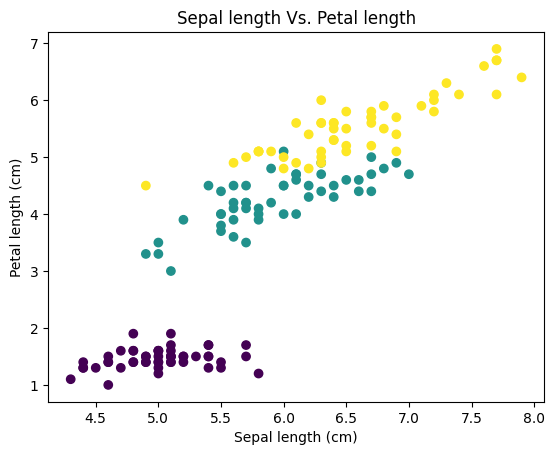

In [9]:
plt.title('Sepal length Vs. Petal length')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['species'])
plt.show()

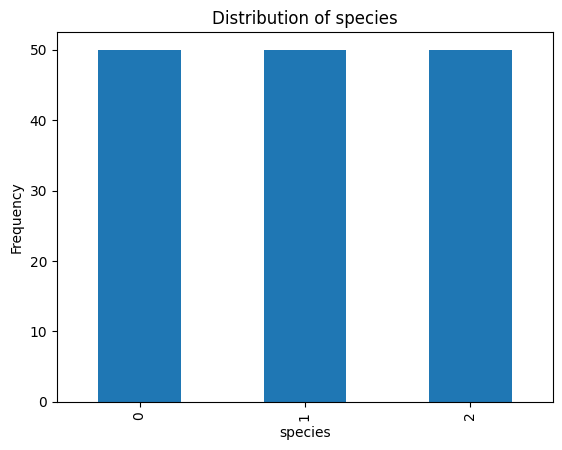

In [10]:
plt.title('Distribution of species')
plt.xlabel('Species')
plt.ylabel('Frequency')
df['species'].value_counts().plot(kind='bar')
plt.show()

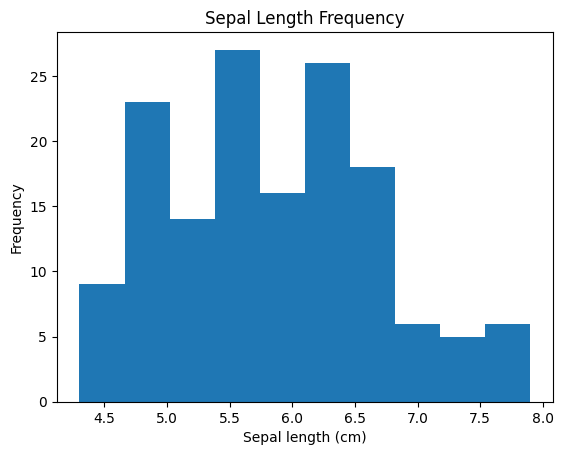

In [11]:
plt.title('Sepal Length Frequency')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Frequency')
plt.hist(df['sepal length (cm)'])
plt.show()

In [12]:
corr = df.corr()

In [13]:
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


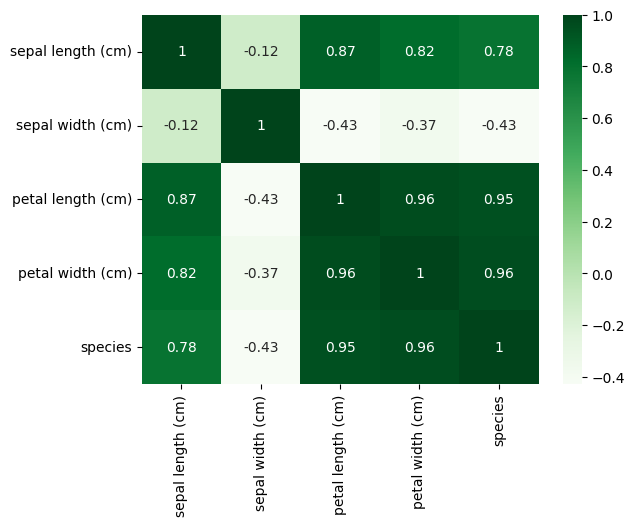

In [14]:
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [17]:
df.ndim

2

In [18]:
df.size

750

In [19]:
df.shape

(150, 5)

# Splitting the Dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [22]:
print(X_train)

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.

In [23]:
print(y_train)

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


In [24]:
print(X_test)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]]


# Model Fitting & Evaluation

In [25]:
models = {
    'Logistic': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DTC': DecisionTreeClassifier(),
    'RFC': RandomForestClassifier(),
    'SVM': SVC(),
    'Gaussian': [GaussianNB(), MultinomialNB()]
}

accuracies = {}

In [26]:
for name, model in models.items():
    if name == 'Gaussian':
        i = 0 
        while i != len(model):
            model[i].fit(X_train, y_train)
            y_pred = model[i].predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies[str(model[i]).split('(')[0]] = accuracy
            i += 1
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy

# Model Evaluation

In [27]:
accuracies

{'Logistic': 1.0,
 'KNN': 1.0,
 'DTC': 1.0,
 'RFC': 1.0,
 'SVM': 1.0,
 'GaussianNB': 1.0,
 'MultinomialNB': 0.9}

* Impression: 100% accuracy by various models indicates some thing might not be proper. Let's try cross validation

# Cross Validation based evaluation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Perform 10-fold cross-validation
k = 10
for name, model in models.items():        
    if name == 'Gaussian':
        # For GaussianNB and MultinomialNB
        for nb_model in model:
            scores = cross_val_score(nb_model, X, y, cv=k, scoring='accuracy')
            accuracies[str(nb_model).split('(')[0]] = np.mean(scores)
    else:
        if name == 'Logistic':
            # For logistic regression
            lr = LogisticRegression(max_iter=500)
            scores = cross_val_score(lr, X, y, cv=k, scoring='accuracy')
            accuracies[name] = np.mean(scores)
        else:
            # For all other models
            scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
            accuracies[name] = np.mean(scores)

# Display the accuracies
print("Model Accuracies with 10-Fold Cross-Validation:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

Model Accuracies with 10-Fold Cross-Validation:
Logistic: 0.9733
KNN: 0.9667
DTC: 0.9533
RFC: 0.9600
SVM: 0.9733
GaussianNB: 0.9533
MultinomialNB: 0.9533


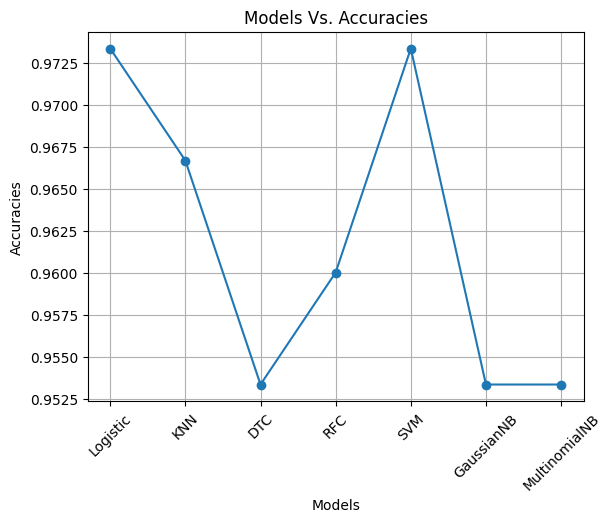

In [30]:
plt.title('Models Vs. Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.xticks(rotation=45)
plt.grid()
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.show()

# Conclusion: 

<h3>After training our models. We concluded that Logistic Regression is one of the best model among all model for Iris flower species classification purpose. Producing an accuracy of above 97%.</h3>

# Model dumping

In [31]:
models['Logistic']

LogisticRegression()

In [32]:
import joblib

# Assuming `random_search.best_estimator_` contains the best-tuned model
best_model = models['Logistic']

# Save the model
joblib.dump(best_model, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")

Model saved as 'logistic_regression_model.pkl'


# Load the model for testing

In [33]:
# Load the model
loaded_model = joblib.load('logistic_regression_model.pkl')

In [34]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
print(df.iloc[0, :-1].values.reshape(1, -1), df['species'][0])
print(df.iloc[-1, :-1].values.reshape(1, -1), df['species'][149])
print(df.iloc[-50, :-1].values.reshape(1, -1), df['species'][99])

[[5.1 3.5 1.4 0.2]] 0
[[5.9 3.  5.1 1.8]] 2
[[6.3 3.3 6.  2.5]] 1


In [36]:
# Make predictions

# Should predict 0
predictions = loaded_model.predict(df.iloc[0, :-1].values.reshape(1, -1))
print(f"Actual: {df['species'][0]}, Predicted: {predictions[0]}")

# Should predict 1
predictions = loaded_model.predict(df.iloc[-1, :-1].values.reshape(1, -1))
print(f"Actual: {df['species'][149]}, Predicted: {predictions[0]}")

# Should predict 2
predictions = loaded_model.predict(df.iloc[-50, :-1].values.reshape(1, -1))
print(f"Actual: {df['species'][99]}, Predicted: {predictions[0]}")

Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 2


# Stream lit

In [37]:
%%writefile app.py

import streamlit as st
import joblib

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

# Map numerical outputs to categories
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Streamlit app
def main():
    st.title("Iris Flower Species Prediction")
    st.write("Adjust the sliders for input values and get the predicted flower species!")

    # Input sliders
    sepal_length = st.slider("Sepal Length (cm)", min_value=4.0, max_value=8.0, step=0.1, value=5.0)
    sepal_width = st.slider("Sepal Width (cm)", min_value=2.0, max_value=4.5, step=0.1, value=3.0)
    petal_length = st.slider("Petal Length (cm)", min_value=1.0, max_value=7.0, step=0.1, value=4.0)
    petal_width = st.slider("Petal Width (cm)", min_value=0.1, max_value=2.5, step=0.1, value=1.0)

    # Prediction
    if st.button("Predict"):
        input_features = [[sepal_length, sepal_width, petal_length, petal_width]]
        prediction = model.predict(input_features)[0]
        st.success(f"The predicted species is: {species_mapping[prediction]}")

if __name__ == "__main__":
    main()

Overwriting app.py


In [38]:
!pip install streamlit

In [39]:
!streamlit --version

Streamlit, version 1.40.1


In [40]:
!streamlit run app.py

^C
